# AKONA CIKO: Agricultural _Dataset _Project

## Table of Contents

#### Requirements.txt_file:

#### 1. Project Overview:

#### 2. Dataset details:

#### 3. Packages & Libraries:

##### Import relevant libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

#### 4. Data Pre-processing & Processing:

##### Ignore warning(s) _for a cleaner notebook

In [5]:
# Code that allows us to ignore 'warnings', just incase they pop_up:

import warnings 
warnings.filterwarnings('ignore')

##### Load dataset_

In [6]:
agric_set = pd.read_csv("co2_emissions_from_agri.csv")

##### Dataset successfully loaded_

In [4]:
agric_set.head(5)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


###### Checking last 3 rows of dataset_

In [8]:
agric_set.tail(3)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


##### Handling of leading / trailling spaces_

In [7]:
# Code checks & trims leading and or trailing spaces:
agric_set.columns= agric_set.columns.str.strip()
print(agric_set.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


##### Important info regarding dataset_

In [8]:
# More info of the dataset:
agric_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

##### Looking for Nulls / Missing values / Blanks in our dataset_

In [9]:
# Null values that appear on each feature or column:
agric_set.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


##### Percentage_(%) of features with null values_

In [14]:
# Percentage of features with null values :
null_counts = agric_set.isnull().sum()

total_columns = agric_set.shape[1]
null_features_count = (null_counts > 0).sum()
null_features_percentage = (null_features_count / total_columns) * 100

print(f"Percentage of features with Null values: {null_features_percentage:.2f}%")

Percentage of features with Null values: 35.48%


#### Feature Engineering _ Deployment of different techniques for handling missing values / nulls:

##### 1. Imputation with median _savanna fires

In [15]:
# Skewness and Kurtosis technique for "Savanna fires" column:
skewness = agric_set['savanna_fires'].skew()
kurtosis = agric_set['savanna_fires'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 10.347116822388163
Kurtosis: 157.12347335007266


In [173]:
# Since the data is not normally distributed & is extremely right skewed, using the median would be more robust approach for imputing missing values:
agric_set['savanna_fires'].fillna(agric_set['savanna_fires'].median(), inplace= True)

# Verify if this indeed worked ???
agric_set.isnull().sum()

area                               0
year                               0
savanna_fires                      0
forest_fires                       0
crop_residues                      0
rice_cultivation                   0
drained_organic_soils_(co2)        0
pesticides_manufacturing           0
food_transport                     0
forestland                         0
net_forest_conversion              0
food_household_consumption         0
food_retail                        0
on-farm_electricity_use            0
food_packaging                     0
agrifood_systems_waste_disposal    0
food_processing                    0
fertilizers_manufacturing          0
ippu                               0
manure_applied_to_soils            0
manure_left_on_pasture             0
manure_management                  0
fires_in_organic_soils             0
fires_in_humid_tropical_forests    0
on-farm_energy_use                 0
rural_population                   0
urban_population                   0
t

In [175]:
# Rounding to nearest integer:
agric_set['savanna_fires'] = agric_set['savanna_fires'].round()

##### 2. Imputation with median _forest fires

In [28]:
from scipy.stats import shapiro

# Shapiro-Wilk test:
stat, p = shapiro(agric_set['forest_fires'].dropna())

# Intepret the result:
if p > 0.05:
    print('The data is normally distributed (Fail to reject HO)')
else:
    print('The data is not normally distributed (Reject HO)')

The data is not normally distributed (Reject HO)


In [171]:
# Since the data is NOT normally distributed, using the median imputation is generally more appropriate:
agric_set['forest_fires'].fillna(agric_set['forest_fires'].median(), inplace= True)

# Rounding to nearest integer:
agric_set['forest_fires'] = agric_set['forest_fires'].round()

##### 3. Imputation with median _crop residuals

In [41]:
# Skewness and Kurtosis technique for "Crop Residues" column:
skewness = agric_set['crop_residues'].skew()
kurtosis = agric_set['crop_residues'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.105082438285656
Kurtosis: 39.239780020520875


In [167]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['crop_residues'].fillna(agric_set['crop_residues'].median(), inplace= True)

# Rounding to nearest integer:
agric_set['crop_residues'] = agric_set['crop_residues'].round()

#### 4. Regression Imputation _forestland

In [163]:
Regression Imputation:

from sklearn.linear_model import LinearRegression

# Seperate rows with missing values:
missing_forestland = agric_set['forestland'].isnull()

# Regression model training on rows without missing values:
reg = LinearRegression()
reg.fit(agric_set.loc[~missing_forestland, ['food_transport', 'food_retail']], agric_set.loc[~missing_forestland, 'forestland'])

# Predict missing values:
agric_set.loc[missing_forestland, 'forestland'] = reg.predict(agric_set.loc[missing_forestland, ['food_transport', 'food_retail']])

In [164]:
agric_set['forestland'] = agric_set['forestland'].round()

#### 5. Imputation with median _net forest conversion

In [55]:
# Skewness and Kurtosis technique for "Net Forest conversion" column:
skewness = agric_set['net_forest_conversion'].skew()
kurtosis = agric_set['net_forest_conversion'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 11.77165033927154
Kurtosis: 157.78022563919293


In [159]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['net_forest_conversion'].fillna(agric_set['net_forest_conversion'].median(), inplace= True)

# Rounding off for consistency:
agric_set['net_forest_conversion'] = agric_set['net_forest_conversion'].round()

#### 6. Imputation with median _food household consumption

In [60]:
# Skewness and Kurtosis technique for "Food Household Consumption" column:
skewness = agric_set['food_household_consumption'].skew()
kurtosis = agric_set['food_household_consumption'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 11.356973350891558
Kurtosis: 152.4137544204516


In [156]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['food_household_consumption'].fillna(agric_set['food_household_consumption'].median(), inplace= True)

# Rounding off for consistency:
agric_set['food_household_consumption'] = agric_set['food_household_consumption'].round()

#### 7. Regression Imputation _IPPU

In [10]:
from sklearn.linear_model import LinearRegression

missing_ippu = agric_set['IPPU'].isnull()

# Train a regression model on rows without missing values:
reg = LinearRegression()
reg.fit(agric_set.loc[~missing_ippu, ['Food Processing', 'Manure left on Pasture']], agric_set.loc[~missing_ippu, 'IPPU'])

# Predict missing values for IPPU:
agric_set.loc[missing_ippu, 'IPPU'] = reg.predict(agric_set.loc[missing_ippu, ['Food Processing', 'Manure left on Pasture']])

##### Apply Constraints on Predictions:

In [12]:
# Replace negative predictions with 0
predictions = reg.predict(agric_set.loc[missing_ippu,  ['Food Processing', 'Manure left on Pasture']])
predictions = [max(0, value) for value in predictions] # Replace negatives with 0

# Fill in the missing values with the adjusted predictions:
agric_set.loc[missing_ippu, 'IPPU'] = predictions

In [15]:
# Rounding off for consistency:
agric_set['IPPU'] = agric_set['IPPU'].round()

#### 8. Imputation with median _manure applied to soils

In [17]:
# Skewness and Kurtosis technique for "Manure applied to Soils" column:
skewness = agric_set['Manure applied to Soils'].skew()
kurtosis = agric_set['Manure applied to Soils'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.577909447402731
Kurtosis: 48.33442527360179


In [20]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Manure applied to Soils'].fillna(agric_set['Manure applied to Soils'].median(), inplace= True)

# Round_off to maintain consistency:
agric_set['Manure applied to Soils'] = agric_set['Manure applied to Soils'].round()

#### 9. Imputation with median _manure management

In [23]:
# Skewness and Kurtosis technique for "Manure management" column:
skewness = agric_set['Manure Management'].skew()
kurtosis = agric_set['Manure Management'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.336032598821295
Kurtosis: 42.6660180333373


In [24]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Manure Management'].fillna(agric_set['Manure Management'].median(), inplace = True)

# Round_off values:
agric_set['Manure Management'] = agric_set['Manure Management'].round()

#### 10. Imputation with median _fires in humid tropical forests

In [26]:
# Skewness and Kurtosis technique for "Fires in humid tropical forests" column:
skewness = agric_set['Fires in humid tropical forests'].skew()
kurtosis = agric_set['Fires in humid tropical forests'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 7.045352619346373
Kurtosis: 56.95834975998129


In [27]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Fires in humid tropical forests'].fillna(agric_set['Fires in humid tropical forests'].median(), inplace = True)

# Round_off values:
agric_set['Fires in humid tropical forests'] = agric_set['Fires in humid tropical forests'].round()

#### 11. Imputation with median _on-farm energy use

In [30]:
# Skewness and Kurtosis technique for "On-farm energy use" column:
skewness = agric_set['On-farm energy use'].skew()
kurtosis = agric_set['On-farm energy use'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 8.62318307632979
Kurtosis: 95.48875239373888


In [31]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['On-farm energy use'].fillna(agric_set['On-farm energy use'].median(), inplace = True)

# Round_off values:
agric_set['On-farm energy use'] = agric_set['On-farm energy use'].round()

#### Standardize all column names to lower_cases for consistency:

In [10]:
agric_set.columns = agric_set.columns.str.lower().str.replace(' ', '_')

In [11]:
# Rename specific columns:
agric_set.rename(columns= {
           'total_population_-_male': 'total_population - male',
           'total_population_-_female': 'total_population - female'
}, inplace = True)

#### 5. Exploratory Data Analysis (EDA) & Statistics:

In [40]:
# Stats for each column name:
Agric_columns = ['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils_(co2)',
       'pesticides_manufacturing', 'food_transport', 'forestland',
       'net_forest_conversion', 'food_household_consumption', 'food_retail',
       'on-farm_electricity_use', 'food_packaging',
       'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on-farm_energy_use',
       'rural_population', 'urban_population', 'total_population - male',
       'total_population - female', 'total_emission',
       'average_temperature_°c']

Agric_summary = agric_set[Agric_columns].describe()
print(Agric_summary)

              year  savanna_fires  forest_fires  crop_residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       rice_cultivation  drained_organic_soils_(co2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for Visualizations_
sns.set(style = "whitegrid")

##### 1. Top Emission Sources in Total Emission_ IPPU & Net forest conversion.

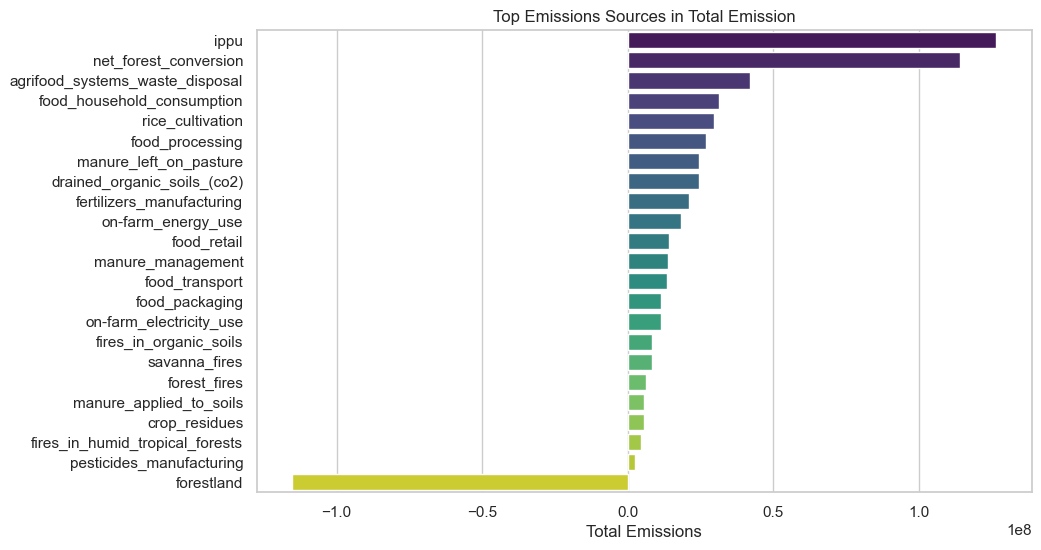

In [45]:
# Summing emissions by source columns_
source_columns = ['savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation',
                  'drained_organic_soils_(co2)', 'pesticides_manufacturing', 'food_transport',
                  'forestland', 'net_forest_conversion', 'food_household_consumption', 'food_retail',
                  'on-farm_electricity_use', 'food_packaging', 'agrifood_systems_waste_disposal',
                  'food_processing', 'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
                  'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
                  'fires_in_humid_tropical_forests', 'on-farm_energy_use']

emissions_by_source = agric_set[source_columns].sum().sort_values(ascending=False)

# Plot_
plt.figure(figsize=(10, 6))
sns.barplot(x=emissions_by_source.values, y= emissions_by_source.index, palette = "viridis")
plt.title('Top Emissions Sources in Total Emission')
plt.xlabel('Total Emissions')
plt.show()

##### 2. Emission Changes Overtime by Region & Source_ 

In [59]:
# Ensure Correct Data Type for the 'year' feature_
agric_set['year'] =  pd.to_numeric(agric_set['year'], errors= 'coerce')

In [61]:
# Small data check_
sample_data = agric_set[['year', 'forest_fires', 'area']].head(10)
print(sample_data)

   year  forest_fires         area
0  1990           0.0  Afghanistan
1  1991           0.0  Afghanistan
2  1992           0.0  Afghanistan
3  1993           0.0  Afghanistan
4  1994           0.0  Afghanistan
5  1995           0.0  Afghanistan
6  1996           0.0  Afghanistan
7  1997           0.0  Afghanistan
8  1998           0.0  Afghanistan
9  1999           0.0  Afghanistan


In [63]:
# Find rows where year is non-numeric_
non_numeric_years = agric_set[pd.to_numeric(agric_set['year'], errors= 'coerce').isnull()]
print(non_numeric_years)

Empty DataFrame
Columns: [area, year, savanna_fires, forest_fires, crop_residues, rice_cultivation, drained_organic_soils_(co2), pesticides_manufacturing, food_transport, forestland, net_forest_conversion, food_household_consumption, food_retail, on-farm_electricity_use, food_packaging, agrifood_systems_waste_disposal, food_processing, fertilizers_manufacturing, ippu, manure_applied_to_soils, manure_left_on_pasture, manure_management, fires_in_organic_soils, fires_in_humid_tropical_forests, on-farm_energy_use, rural_population, urban_population, total_population - male, total_population - female, total_emission, average_temperature_°c]
Index: []

[0 rows x 31 columns]


In [64]:
# Drop rows with non-numeric Year values_
agric_set = agric_set[pd.to_numeric(agric_set['year'], errors='coerce').notnull()]

In [66]:
# Check for duplicate rows_
duplicates =  agric_set.duplicated()
print(agric_set[duplicates])

Empty DataFrame
Columns: [area, year, savanna_fires, forest_fires, crop_residues, rice_cultivation, drained_organic_soils_(co2), pesticides_manufacturing, food_transport, forestland, net_forest_conversion, food_household_consumption, food_retail, on-farm_electricity_use, food_packaging, agrifood_systems_waste_disposal, food_processing, fertilizers_manufacturing, ippu, manure_applied_to_soils, manure_left_on_pasture, manure_management, fires_in_organic_soils, fires_in_humid_tropical_forests, on-farm_energy_use, rural_population, urban_population, total_population - male, total_population - female, total_emission, average_temperature_°c]
Index: []

[0 rows x 31 columns]


In [67]:
agric_set = agric_set.drop_duplicates()

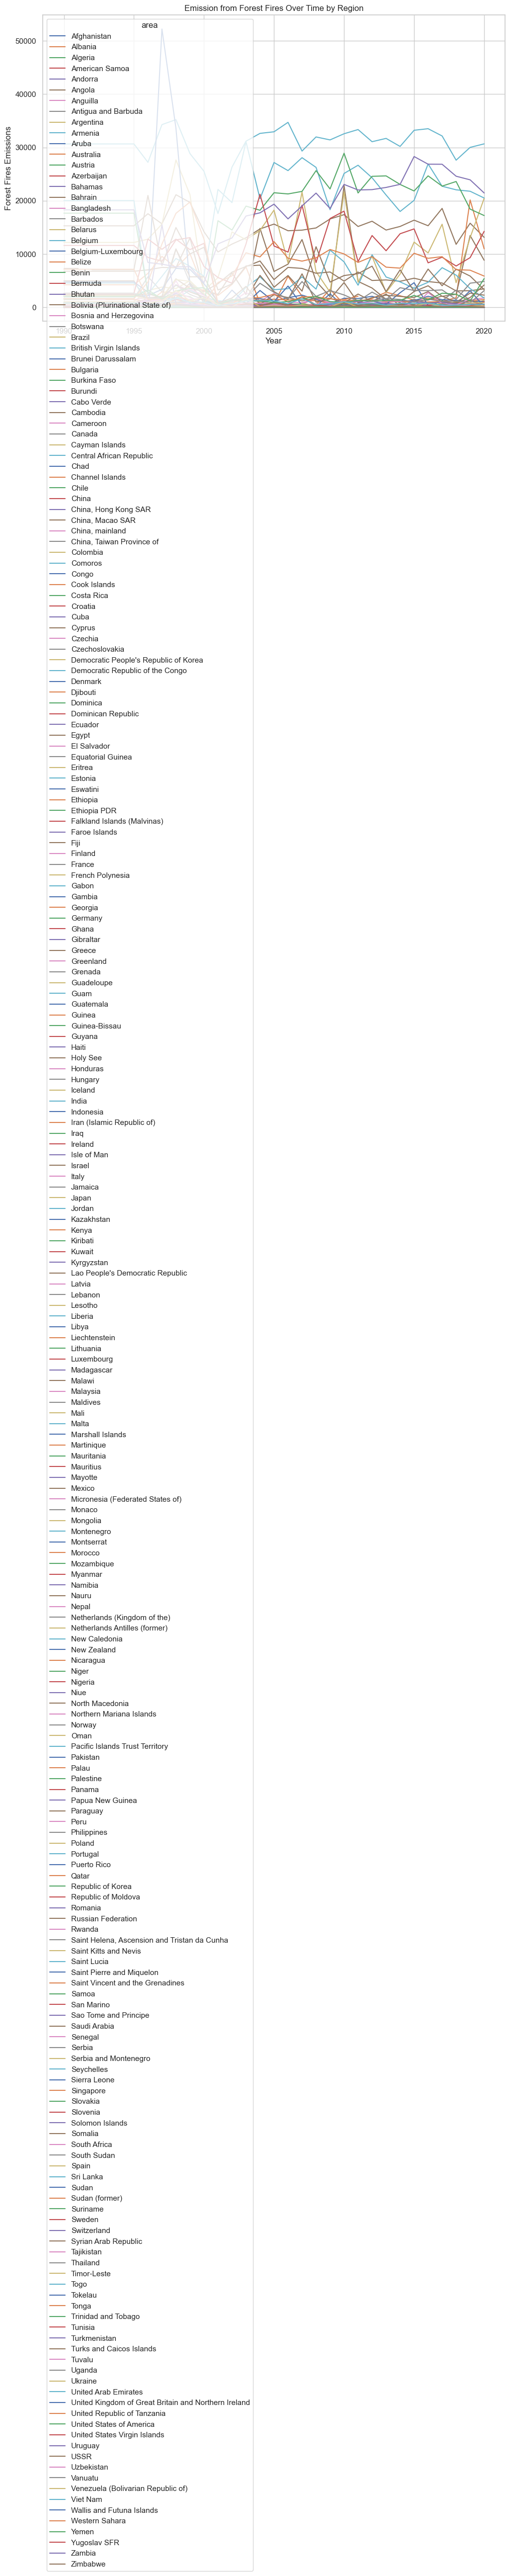

In [71]:
import matplotlib.pyplot as plt

# Attempting to plot once again_
plt.figure(figsize=(12, 8))
for area in agric_set['area'].unique():
    subset = agric_set[agric_set['area'] == area]
    plt.plot(subset['year'], subset['forest_fires'], label= area)

plt.title('Emission from Forest Fires Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Forest Fires Emissions')
plt.legend(title='area')
plt.show()

##### 3. Relationship Between Agricultural Practices and Total Emission_

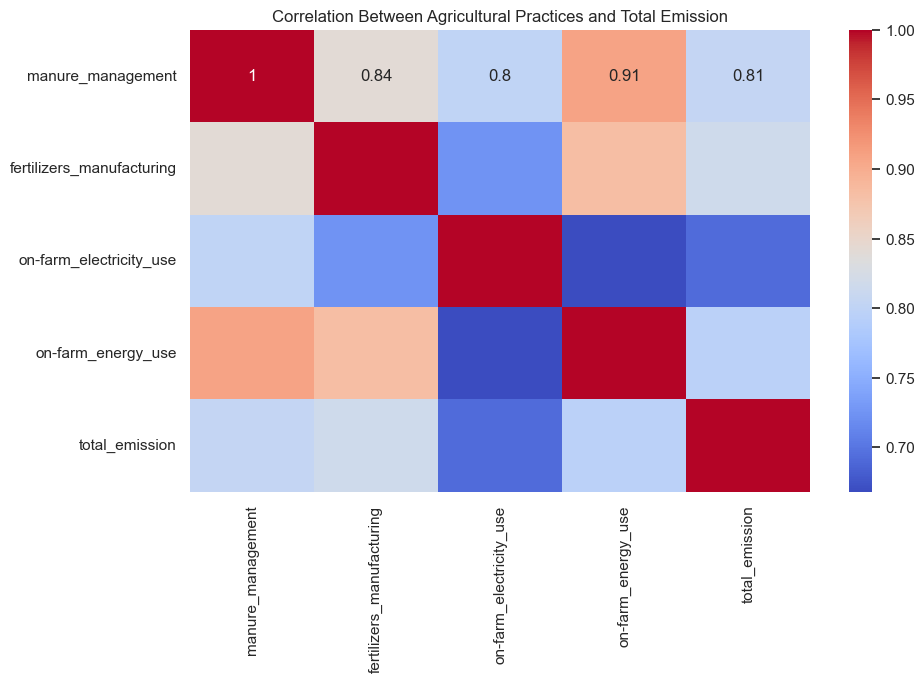

In [102]:
# Correlation heatmap between selected agricultural practices and total emission_
practice_columns = ['manure_management', 'fertilizers_manufacturing', 'on-farm_electricity_use', 
                    'on-farm_energy_use', 'total_emission']
correlation_data = agric_set[practice_columns].corr()

# Plot heatmap_
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Agricultural Practices and Total Emission')
plt.show()

##### 4. Industrial vs Natural Emissions_

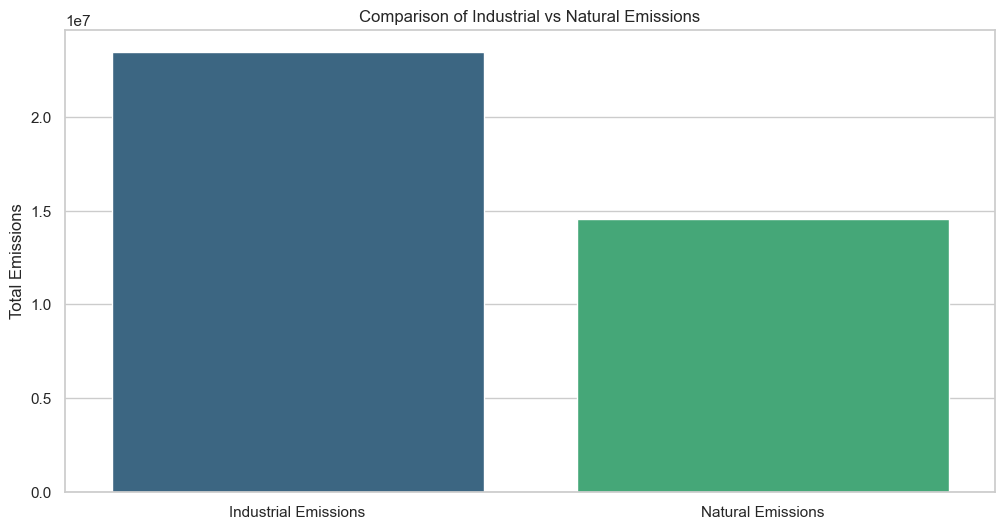

In [104]:
industrial_sources = agric_set[['pesticides_manufacturing', 'fertilizers_manufacturing']].sum()
natural_sources = agric_set[['forest_fires', 'savanna_fires']].sum()

industrial_vs_natural = pd.DataFrame({
    'Industrial Emissions': industrial_sources, 
    'Natural Emissions': natural_sources
}).sum()

# Let's plot_
plt.figure(figsize=(12, 6))
sns.barplot(x= industrial_vs_natural.index, y= industrial_vs_natural.values, palette= 'viridis')
plt.title('Comparison of Industrial vs Natural Emissions')
plt.ylabel('Total Emissions')
plt.show()

##### 5. What are the top industrial sources contributing to total emissions over time _?

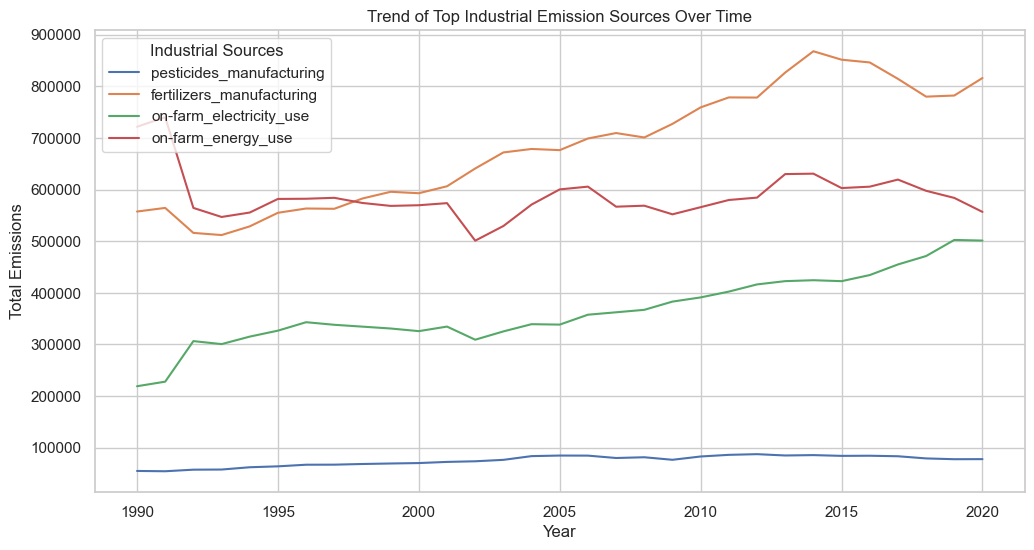

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for industrial sources_
industrial_sources = ['pesticides_manufacturing', 'fertilizers_manufacturing', 'on-farm_electricity_use', 'on-farm_energy_use']

# Pivot data for plotting_
industrial_data = agric_set[['year', 'area'] + industrial_sources]
industrial_data = industrial_data.groupby(['year']).sum().reset_index()

# Plot emissions over time for each industrial source_
plt.figure(figsize=(12, 6))
for source in industrial_sources:
    sns.lineplot(data=industrial_data, x= 'year', y= source, label= source)
plt.title('Trend of Top Industrial Emission Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title= "Industrial Sources")
plt.show()

##### 6. How do emissions from agricultural activities vary acrosss different regions _?

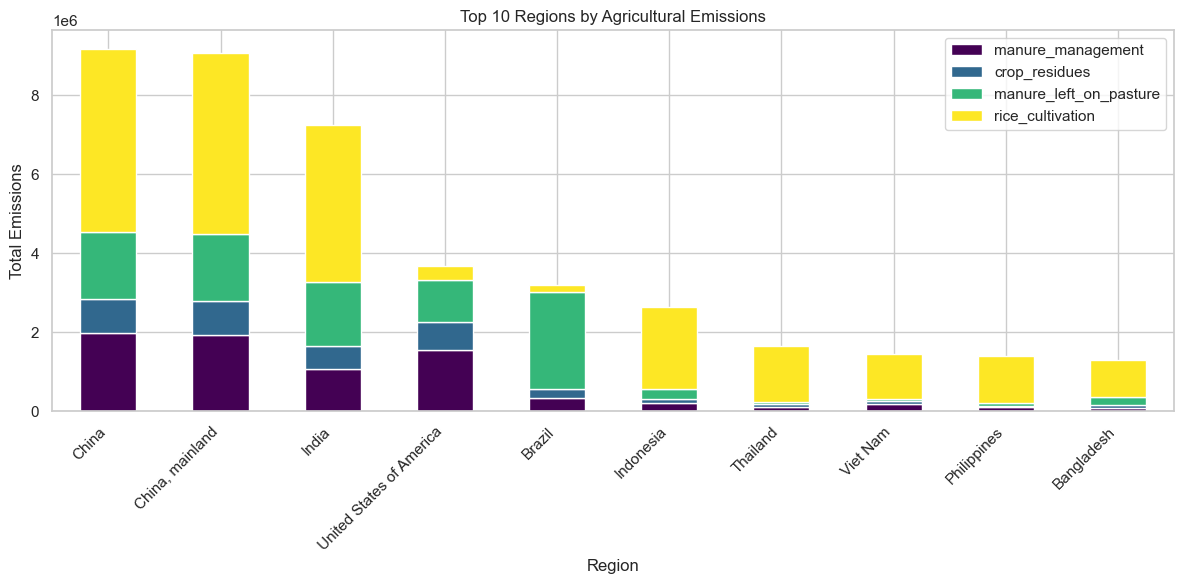

In [105]:
# Display Only Top N Regions_
top_n = 10 
top_regions = agric_region_data.sum(axis=1).nlargest(top_n).index
agric_top_data = agric_region_data.loc[top_regions]

# Plot total agricultural emissions by region_
agric_top_data.plot(kind= 'bar', stacked= True, figsize=(12, 6), colormap='viridis')
plt.title(f'Top {top_n} Regions by Agricultural Emissions')
plt.xlabel('Region')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Engineered Features_

In [ ]:
For Rural population_

In [20]:
# For Rural population_
agric_set['emissions_per_capita_rural'] = agric_set['total_emission'] / agric_set['rural_population']

In [115]:
agric_set.drop('emissions_per_capita', axis=1, inplace=True)

In [21]:
# Round_off values:
agric_set['emissions_per_capita_rural'] = agric_set['emissions_per_capita_rural'].round(5)

In [ ]:
For Urban population_

In [22]:
# For Urban population_
agric_set['emissions_per_capita_urban'] = agric_set['total_emission'] / agric_set['urban_population']

# Round_off values:
agric_set['emissions_per_capita_urban'] = agric_set['emissions_per_capita_urban'].round(5)

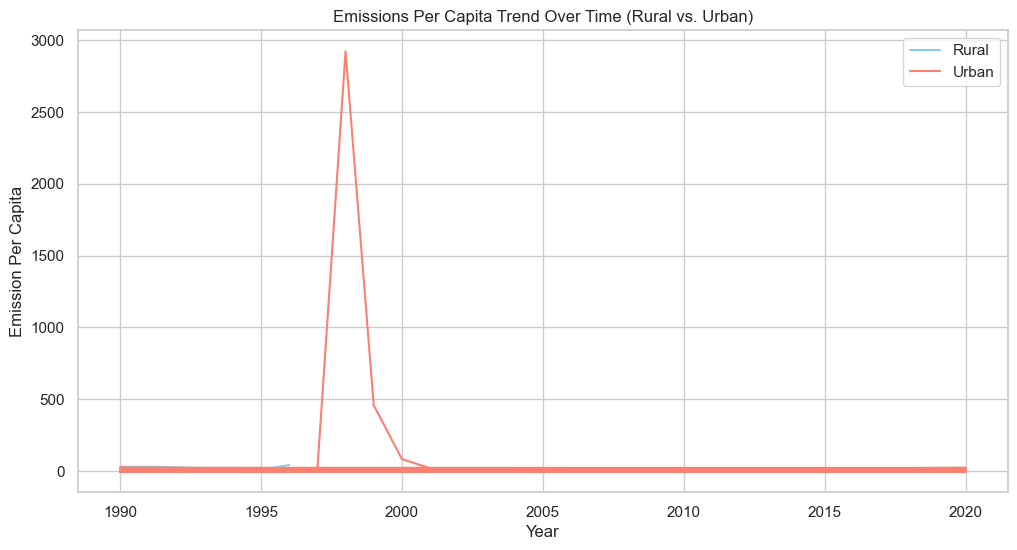

In [176]:
plt.figure(figsize=(12, 6))
plt.plot(agric_set['year'], agric_set['emissions_per_capita_rural'], label= 'Rural', color= 'skyblue')
plt.plot(agric_set['year'], agric_set['emissions_per_capita_urban'], label= 'Urban', color= 'salmon')
plt.title("Emissions Per Capita Trend Over Time (Rural vs. Urban)")
plt.xlabel("Year")
plt.ylabel("Emission Per Capita")
plt.legend()
plt.show()

##### Upon performing " Iteration & Review" of my cleaned dataset, picked up a minor issue that needed to be address_

##### Imputation with median_

In [23]:
import numpy as np

# Replace "inf" with NaN in the specified columns_
agric_set['emissions_per_capita_rural'].replace([np.inf, -np.inf], np.nan, inplace=True)
agric_set['emissions_per_capita_urban'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with median_
rural_median = agric_set['emissions_per_capita_rural'].median()
urban_median = agric_set['emissions_per_capita_urban'].median()

agric_set['emissions_per_capita_rural'].fillna(rural_median, inplace=True)
agric_set['emissions_per_capita_urban'].fillna(urban_median, inplace=True)

##### Hypothesis Testing Ideas with the CO2 Emissions Dataset_

In [198]:
from scipy.stats import ttest_rel

# Perform paired t-test_
t_stat, p_value = ttest_rel(agric_set['emissions_per_capita_rural'],
                            agric_set['emissions_per_capita_urban'])

print("T-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion based on p-value_
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significan difference in emissions per capita between & urban populations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in emissions per capita between rural & urban populations")

T-statistic: -1.0652565155700322
p-value: 0.2867967965313677
Fail to reject the null hypothesis: No significant difference in emissions per capita between rural & urban populations


In [200]:
For Urban area:

from scipy.stats import ttest_ind

# Split data into two periods_
period_1 = agric_set[(agric_set['year'] >= 1990) & (agric_set['year'] <= 2000)]['emissions_per_capita_urban'].dropna()
period_2 = agric_set[(agric_set['year'] > 2000) & (agric_set['year'] <= 2021)]['emissions_per_capita_urban'].dropna()

# Perform two-sample t-test_
t_stat, p_value = ttest_ind(period_1, period_2)

print("T-statistic:", t_stat)
print("p_value:", p_value)

# Conclusion based on p-value_
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant change in emissions per capita between the two time periods.")
else:
    print("Fail to reject the null hypothesis: No significant change in emissions per capita between the two time periods.")

T-statistic: 1.5697573637381395
p_value: 0.11651700833284512
Fail to reject the null hypothesis: No significant change in emissions per capita between the two time periods.


In [202]:
For Rural area:

# Split data into two periods_
period_1 = agric_set[(agric_set['year'] >= 1990) & (agric_set['year'] <= 2000)]['emissions_per_capita_rural'].dropna()
period_2 = agric_set[(agric_set['year'] > 2000) & (agric_set['year'] <= 2021)]['emissions_per_capita_rural'].dropna()

# Perform two-sample t-test_
t_stat, p_value = ttest_ind(period_1, period_2)

print("T-statistic:", t_stat)
print("p_value:", p_value)

# Conclusion based on p-value_
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant change in emissions per capita between the two time periods.")
else:
    print("Fail to reject the null hypothesis: No significant change in emissions per capita between the two time periods.")

T-statistic: 0.082552766491573
p_value: 0.9342095327799494
Fail to reject the null hypothesis: No significant change in emissions per capita between the two time periods.


##### 6. Regresssion Models:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
# Displaying data information_
agric_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             6965 non-null   object 
 1   year                             6965 non-null   int64  
 2   savanna_fires                    6965 non-null   float64
 3   forest_fires                     6965 non-null   float64
 4   crop_residues                    6965 non-null   float64
 5   rice_cultivation                 6965 non-null   float64
 6   drained_organic_soils_(co2)      6965 non-null   float64
 7   pesticides_manufacturing         6965 non-null   float64
 8   food_transport                   6965 non-null   float64
 9   forestland                       6965 non-null   float64
 10  net_forest_conversion            6965 non-null   float64
 11  food_household_consumption       6965 non-null   float64
 12  food_retail         

##### Heatmap for the top 21 correlated matrix_

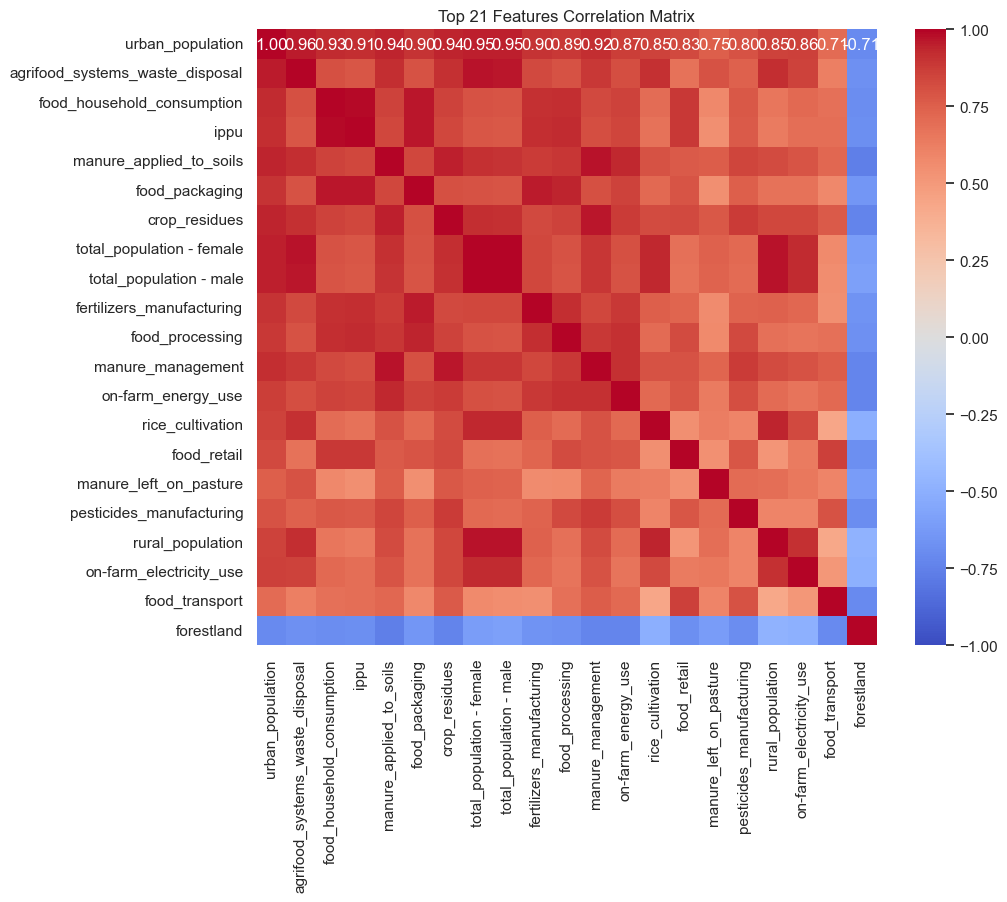

urban_population                   0.907774
agrifood_systems_waste_disposal    0.879840
food_household_consumption         0.861937
ippu                               0.851443
manure_applied_to_soils            0.845956
food_packaging                     0.842555
crop_residues                      0.836231
total_population - female          0.823163
total_population - male            0.818163
fertilizers_manufacturing          0.816063
food_processing                    0.814844
manure_management                  0.805168
on-farm_energy_use                 0.796254
rice_cultivation                   0.756638
food_retail                        0.755753
manure_left_on_pasture             0.755672
pesticides_manufacturing           0.746782
rural_population                   0.705162
on-farm_electricity_use            0.692060
food_transport                     0.657877
net_forest_conversion              0.431919
Name: total_emission, dtype: float64


In [218]:
# Drop non-numeric columns_
agric_set_numeric = agric_set.select_dtypes(include=[np.number])

# Correlation matrix_
corr_matrix = agric_set_numeric.corr()

# Find the top 21 features with the strongest correlation (positive or negative) with "total_emission"_
top_features = corr_matrix['total_emission'].abs().sort_values(ascending=False).iloc[1:22].index

# Filter the correlation matrix to only include these top features_
filtered_corr_matrix = corr_matrix.loc[top_features, top_features]

# Visualize the correlation matrix_
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin= -1, vmax= 1)
plt.title('Top 21 Features Correlation Matrix')
plt.show()

# Focus on correlations with Total emission_
bhi_corr = corr_matrix['total_emission'].sort_values(ascending=False).iloc[1:22]
print(bhi_corr)

Since "Total_emission" is a key target, will focus on variables that are likely to contribute to overall emissions.

In [224]:
# Define the features and target_
X = agric_set[['rural_population', 'urban_population', 'crop_residues', 'manure_left_on_pasture']]
y = agric_set['total_emission']

# Split the data into training and test sets_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model_
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate_
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 8003781725.490063
R^2 Score: 0.8874900329911893


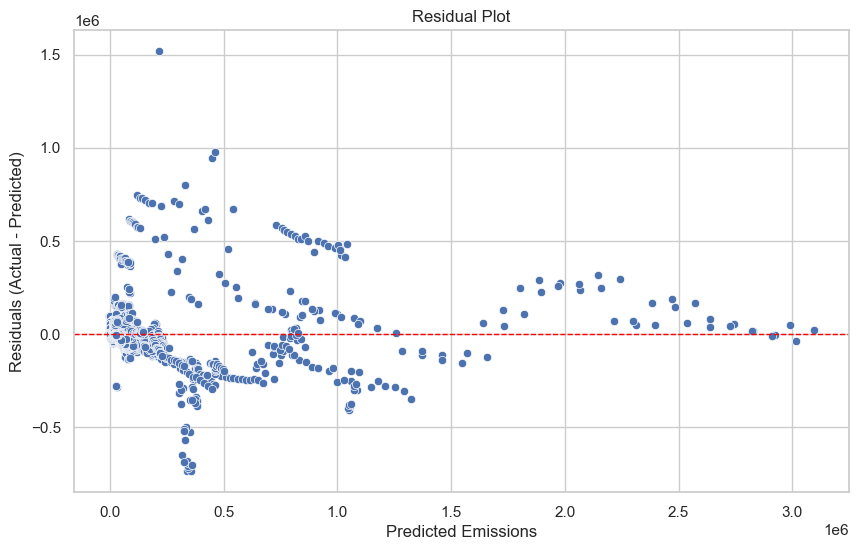

In [227]:
# Train the model
from sklearn.linear_model import LinearRegression

# Define X and y based on the selected columns and target variable
X = agric_set[['rural_population', 'urban_population', 'crop_residues', 'manure_left_on_pasture']]  # Modify as needed
y = agric_set['total_emission']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot the residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Emissions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

##### Further Diagnostic Tests_ Breusch-Pagan test for heteroscedasticity

In [228]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Step 1: Fit the linear regression model
X = agric_set[['rural_population', 'urban_population', 'crop_residues', 'manure_left_on_pasture']] 
y = agric_set['total_emission']
X = sm.add_constant(X)  # Adds a constant term to the predictors

model = sm.OLS(y, X).fit()

# Step 2: Perform the Breusch-Pagan test
# het_breuschpagan requires the residuals and the independent variables
residuals = model.resid
exog = model.model.exog

bp_test = het_breuschpagan(residuals, exog)

# Step 3: Extract test results
bp_stat = bp_test[0]  # Breusch-Pagan statistic
bp_p_value = bp_test[1]  # p-value

print("Breusch-Pagan Test Statistic:", bp_stat)
print("p-value:", bp_p_value)

# Interpretation
if bp_p_value < 0.05:
    print("There is evidence of heteroscedasticity (non-constant variance).")
else:
    print("No significant evidence of heteroscedasticity.")

Breusch-Pagan Test Statistic: 403.7188560544515
p-value: 4.372798690215422e-86
There is evidence of heteroscedasticity (non-constant variance).


##### Approaches to Address Heteroscedasticity_ 

In [230]:
import numpy as np

# Apply a log transformation to the dependent variable_
y_log = np.log(y + 1)  # Add 1 to avoid issues with log(0)

# Fit the model with the transformed target_
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Nov 2024   Prob (F-statistic):                nan
Time:                        09:52:07   Log-Likelihood:                    nan
No. Observations:                6965   AIC:                               nan
Df Residuals:                    6960   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                       

##### Steps to try & address these issues_

In [231]:
agric_set_numeric = agric_set_numeric.dropna()  # Remove rows with NaNs

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature_
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                  feature        VIF
0                   const   1.162907
1        rural_population   3.881732
2        urban_population  10.023830
3           crop_residues   9.926906
4  manure_left_on_pasture   2.547175


##### Re-run Regression without urban_population_

In [233]:
import statsmodels.api as sm

# Drop 'urban_population' from the feature set_
X_reduced = X.drop(columns=['urban_population'])

# Add a constant term for the intercept_
X_reduced = sm.add_constant(X_reduced)

# Fit the model again_
model_reduced = sm.OLS(y, X_reduced).fit()

# Print the summary to see if there’s an improvement_
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     6221.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:22:31   Log-Likelihood:                -91281.
No. Observations:                6965   AIC:                         1.826e+05
Df Residuals:                    6961   BIC:                         1.826e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4923

##### Calculate VIFs for the Reduced Model_

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIFs for the reduced feature set_
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_reduced)

                  feature       VIF
0                   const  1.158544
1        rural_population  3.415282
2           crop_residues  4.503730
3  manure_left_on_pasture  2.537134


In [235]:
import statsmodels.api as sm

# Define the features and add a constant for intercept_
X = agric_set[['rural_population', 'crop_residues', 'manure_left_on_pasture']]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = agric_set['total_emission']

# Fit the OLS regression model_
model = sm.OLS(y, X).fit()

# Print the summary_
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     6221.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:58:24   Log-Likelihood:                -91281.
No. Observations:                6965   AIC:                         1.826e+05
Df Residuals:                    6961   BIC:                         1.826e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4923

In [237]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add "agrifood_systems_waste_disposal" to the existing model_
X = agric_set[['rural_population', 'crop_residues', 'manure_left_on_pasture', 'agrifood_systems_waste_disposal']]
X = sm.add_constant(X)
y = agric_set['total_emission']

# Fit the model_
model = sm.OLS(y, X).fit()
print(model.summary())

# Calculate and display VIFs_
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     9692.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:09:27   Log-Likelihood:                -89264.
No. Observations:                6965   AIC:                         1.785e+05
Df Residuals:                    6960   BIC:                         1.786e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [238]:
# Adding "food_household_consumption" to the existing model_
X = agric_set[['rural_population', 'crop_residues', 'manure_left_on_pasture', 'agrifood_systems_waste_disposal', 'food_household_consumption']]
X = sm.add_constant(X)

# Fit the model_
model = sm.OLS(y, X).fit()
print(model.summary())

# Calculate and display VIFs_
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:14:19   Log-Likelihood:                -88391.
No. Observations:                6965   AIC:                         1.768e+05
Df Residuals:                    6959   BIC:                         1.768e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

##### a) Centering and Scaling Variables_

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the features (X) and target variable (y)_
X = agric_set[['rural_population', 'crop_residues', 'manure_left_on_pasture', 
               'agrifood_systems_waste_disposal', 'food_household_consumption']]

y = agric_set['total_emission']

# Split the data into training & testting sets_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize StandardScaler & fit it to the training features_
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)       # The features are now centered and scaled. ...

##### b) Regulariztion method Ridge or Lasso regression on X_train_scaled and X_test_scaled

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that imputes, scales, and applies Ridge regression_
ridge_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=1.0))
ridge_pipeline.fit(X_train, y_train)

# Make predictions_
y_pred_ridge = ridge_pipeline.predict(X_test)

# Calculate performance metrics_
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results (with Imputation):")
print("Mean Squared Error (MSE):", ridge_mse)
print("R^2 Score:", ridge_r2)

Ridge Regression Results (with Imputation):
Mean Squared Error (MSE): 6206211694.165405
R^2 Score: 0.8469803854015188


In [29]:
# Check for NaNs in the training and test sets_
print("Number of NaNs in X_train:", X_train.isna().sum().sum())
print("Number of NaNs in X_test:", X_test.isna().sum().sum())

Number of NaNs in X_train: 1464
Number of NaNs in X_test: 398


In [30]:
# Display columns with NaNs in the training set_
print("Columns with NaNs in X_train:\n", X_train.isna().sum()[X_train.isna().sum() > 0])

# Display columns with NaNs in the test set-
print("Columns with NaNs in X_test:\n", X_test.isna().sum()[X_test.isna().sum() > 0])

Columns with NaNs in X_train:
 crop_residues                 1084
food_household_consumption     380
dtype: int64
Columns with NaNs in X_test:
 crop_residues                 305
food_household_consumption     93
dtype: int64


In [31]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with mean strategy_
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform both X_train and X_test_
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame if needed_
import pandas as pd
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

In [32]:
print("Number of NaNs in X_train_imputed:", X_train_imputed.isna().sum().sum())
print("Number of NaNs in X_test_imputed:", X_test_imputed.isna().sum().sum())

Number of NaNs in X_train_imputed: 0
Number of NaNs in X_test_imputed: 0


In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the Ridge model_
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_imputed, y_train)

# Make predictions_
y_pred_ridge = ridge.predict(X_test_imputed)

# Evaluate performance_
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results (after Imputation):")
print("Mean Squared Error (MSE):", ridge_mse)
print("R^2 Score:", ridge_r2)

Ridge Regression Results (after Imputation):
Mean Squared Error (MSE): 6204995928.2299385
R^2 Score: 0.8470103611812786


##### Code for Alpha Tuning in Ridge and Implementing Lasso_

In [35]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define a range of alpha values to test
alpha_values = [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0, 1000.0]

# Step 2: Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_scaled, y)  # X_scaled and y are the centered/scaled features and target

# Get the best alpha and evaluate the model performance
best_alpha_ridge = ridge_cv.alpha_
ridge_pred = ridge_cv.predict(X_scaled)
ridge_mse = mean_squared_error(y, ridge_pred)
ridge_r2 = r2_score(y, ridge_pred)

print(f"Ridge Best Alpha: {best_alpha_ridge}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R^2: {ridge_r2}")

# Step 3: Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=0)
lasso_cv.fit(X_scaled, y)

# Get the best alpha and evaluate the model performance
best_alpha_lasso = lasso_cv.alpha_
lasso_pred = lasso_cv.predict(X_scaled)
lasso_mse = mean_squared_error(y, lasso_pred)
lasso_r2 = r2_score(y, lasso_pred)

print(f"Lasso Best Alpha: {best_alpha_lasso}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Lasso R^2: {lasso_r2}")

NameError: name 'X_scaled' is not defined

##### Updated Code to Define X_scaled and Perform Alpha Tuning_

In [37]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define a range of alpha values to test
alpha_values = [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0, 1000.0]

# Use imputed training and testing sets, scale both and combine for a unified X_scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Combine scaled training and test data into one X_scaled array
X_scaled = np.vstack([X_train_scaled, X_test_scaled])

# Step 2: Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_scaled, y)  # X_scaled is now defined and usable here

# Get the best alpha and evaluate the model performance
best_alpha_ridge = ridge_cv.alpha_
ridge_pred = ridge_cv.predict(X_scaled)
ridge_mse = mean_squared_error(y, ridge_pred)
ridge_r2 = r2_score(y, ridge_pred)

print(f"Ridge Best Alpha: {best_alpha_ridge}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R^2: {ridge_r2}")

# Step 3: Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=0)
lasso_cv.fit(X_scaled, y)

# Get the best alpha and evaluate the model performance
best_alpha_lasso = lasso_cv.alpha_
lasso_pred = lasso_cv.predict(X_scaled)
lasso_mse = mean_squared_error(y, lasso_pred)
lasso_r2 = r2_score(y, lasso_pred)

print(f"Lasso Best Alpha: {best_alpha_lasso}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Lasso R^2: {lasso_r2}")

Ridge Best Alpha: 1000.0
Ridge MSE: 52060548505.98629
Ridge R^2: 0.0011276846025813914
Lasso Best Alpha: 1000.0
Lasso MSE: 52061536073.63202
Lasso R^2: 0.0011087363969014552


In [38]:
# Step 1: Define a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Use imputed training and testing sets, scale both and combine for a unified X_scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Combine scaled training and test data into one X_scaled array
X_scaled = np.vstack([X_train_scaled, X_test_scaled])

# Step 2: Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_scaled, y)  # X_scaled is now defined and usable here

# Get the best alpha and evaluate the model performance
best_alpha_ridge = ridge_cv.alpha_
ridge_pred = ridge_cv.predict(X_scaled)
ridge_mse = mean_squared_error(y, ridge_pred)
ridge_r2 = r2_score(y, ridge_pred)

print(f"Ridge Best Alpha: {best_alpha_ridge}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R^2: {ridge_r2}")

# Step 3: Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=0)
lasso_cv.fit(X_scaled, y)

# Get the best alpha and evaluate the model performance
best_alpha_lasso = lasso_cv.alpha_
lasso_pred = lasso_cv.predict(X_scaled)
lasso_mse = mean_squared_error(y, lasso_pred)
lasso_r2 = r2_score(y, lasso_pred)

print(f"Lasso Best Alpha: {best_alpha_lasso}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Lasso R^2: {lasso_r2}")

Ridge Best Alpha: 100.0
Ridge MSE: 52058233427.80134
Ridge R^2: 0.0011721034105519612
Lasso Best Alpha: 100.0
Lasso MSE: 52058669596.31321
Lasso R^2: 0.0011637347578223878


In [40]:
# Ensure the required libraries are imported_

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Initialize Ridge regression model_
ridge_model = Ridge(alpha=best_alpha_ridge)  # Use the best alpha from previous tuning

# Initialize RFE_
# Choose the number of features to select (e.g., 5), or you can try different numbers to find the optimal set_
num_features_to_select = 5
rfe = RFE(estimator=ridge_model, n_features_to_select=num_features_to_select)

In [42]:
# Fit RFE_
rfe.fit(X_train_imputed, y_train)

# Get the selected features_
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['rural_population', 'crop_residues', 'manure_left_on_pasture',
       'agrifood_systems_waste_disposal', 'food_household_consumption'],
      dtype='object')


In [43]:
# Transform the train and test sets to only include the selected features
X_train_rfe = X_train_imputed[selected_features]
X_test_rfe = X_test_imputed[selected_features]

# Fit Ridge regression on the selected features
ridge_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_rfe = ridge_model.predict(X_test_rfe)

# Calculate performance metrics
rfe_mse = mean_squared_error(y_test, y_pred_rfe)
rfe_r2 = r2_score(y_test, y_pred_rfe)

print("RFE Ridge Regression Results:")
print("Mean Squared Error (MSE):", rfe_mse)
print("R^2 Score:", rfe_r2)

RFE Ridge Regression Results:
Mean Squared Error (MSE): 6204995930.348547
R^2 Score: 0.8470103611290425


##### Random Forest Regression _Random Forests are generally robust to multicollinearity and non-linear relationships, making them a good next step.

Let's Implement. ..

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0, n_estimators=100)

# Step 2: Fit the model to the training data
rf_regressor.fit(X_train_imputed, y_train)

# Step 3: Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test_imputed)

# Step 4: Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("Mean Squared Error (MSE):", rf_mse)
print("R^2 Score:", rf_r2)

Random Forest Regression Results:
Mean Squared Error (MSE): 472107732.58375865
R^2 Score: 0.9883597681083219


###### Hyperparameter Tuning _although the initial Random Forest model is performing well, we could fine-tune it further by optimizing key parameters

In [45]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, 
                                      n_iter=50, scoring='neg_mean_squared_error', cv=3, 
                                      verbose=2, random_state=0, n_jobs=-1)

# Fit the random search model
rf_random_search.fit(X_train_imputed, y_train)

# Get best parameters
best_rf_model = rf_random_search.best_estimator_
print("Best Parameters:", rf_random_search.best_params_)

# Evaluate the best model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test_imputed)
rf_tuned_mse = mean_squared_error(y_test, y_pred_rf_tuned)
rf_tuned_r2 = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Regression Results:")
print("Mean Squared Error (MSE):", rf_tuned_mse)
print("R^2 Score:", rf_tuned_r2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
Tuned Random Forest Regression Results:
Mean Squared Error (MSE): 480494912.63350075
R^2 Score: 0.9881529747983248


##### Final Steps_

In [46]:
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_imputed.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                           Feature  Importance
3  agrifood_systems_waste_disposal    0.604962
2           manure_left_on_pasture    0.198584
4       food_household_consumption    0.140938
1                    crop_residues    0.034795
0                 rural_population    0.020720


##### Plot the feature importances_

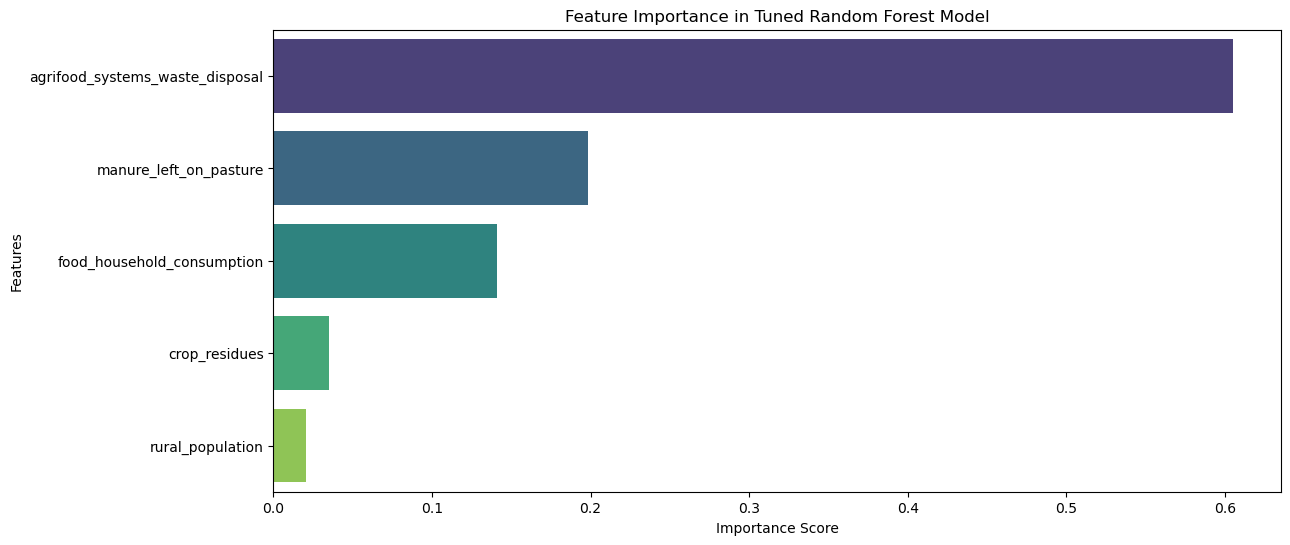

In [53]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming feature importance values and feature names are in two lists
features = ['agrifood_systems_waste_disposal', 'manure_left_on_pasture', 
            'food_household_consumption', 'crop_residues', 'rural_population']
importances = [0.604962, 0.198584, 0.140938, 0.034795, 0.020720]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(13, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Tuned Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_imputed, y_train, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)
print("Average Cross-validated R^2:", cv_scores.mean())

Cross-validated R^2 scores: [0.97238517 0.98273721 0.9873803  0.98525434 0.97642148]
Average Cross-validated R^2: 0.9808356999158547


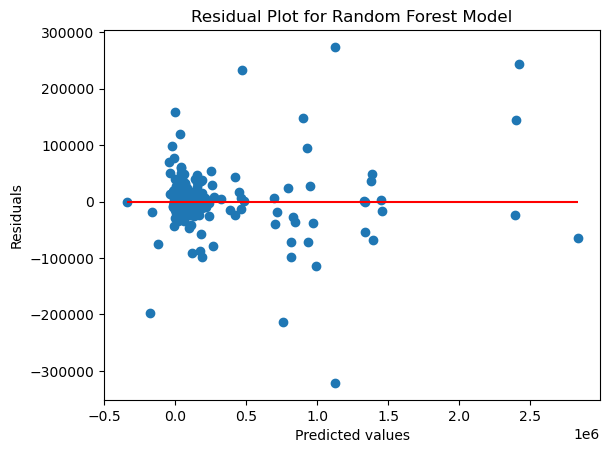

In [48]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_rf_tuned

# Plot residuals
plt.scatter(y_pred_rf_tuned, residuals)
plt.hlines(y=0, xmin=y_pred_rf_tuned.min(), xmax=y_pred_rf_tuned.max(), colors='red')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Model")
plt.show()

In [49]:
import pickle

# Save the model to a file
with open('tuned_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Model saved as 'tuned_random_forest_model.pkl'")

Model saved as 'tuned_random_forest_model.pkl'


##### To Load the Model Later_

In [50]:
with open('tuned_random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example of using the loaded model_
y_pred = loaded_model.predict(X_test_imputed)

#### My tuned Random Forest model appears to be well-suited for predicting total emissions with high accuracy _AWESOME !!

In [54]:
agric_set.to_csv("Agric-sector_cleaned_1.csv")

#### 7. Data Visualization:

#### 8. Results & Insights:

#### 9. Project Manager / Contributor:

Akona Ciko | Akona.Ciko@fnb.co.za | Gibit1 _(GitHub username)